1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable Naive Bayes for this problem. 
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

* Age - Age Of The Customer
* Employment Type - The Sector In Which Customer Is Employed
GraduateOrNot - Whether The Customer Is College Graduate Or Not
* AnnualIncome - The Yearly Income Of The Customer In Indian Rupees
* FamilyMembers - Number Of Members In Customer's Family
* ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country
* TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## Load Dataset

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

#drive.mount("/content/drive")

In [144]:
import pandas as pd
PATH = "/content/TravelInsurancePrediction.csv" # Path to your file

df = pd.read_csv(PATH, index_col=0)
df.head()
#ToDo: Show histogram of dataframe
df


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'AnnualIncome'}>],
       [<Axes: title={'center': 'FamilyMembers'}>,
        <Axes: title={'center': 'ChronicDiseases'}>],
       [<Axes: title={'center': 'TravelInsurance'}>, <Axes: >]],
      dtype=object)

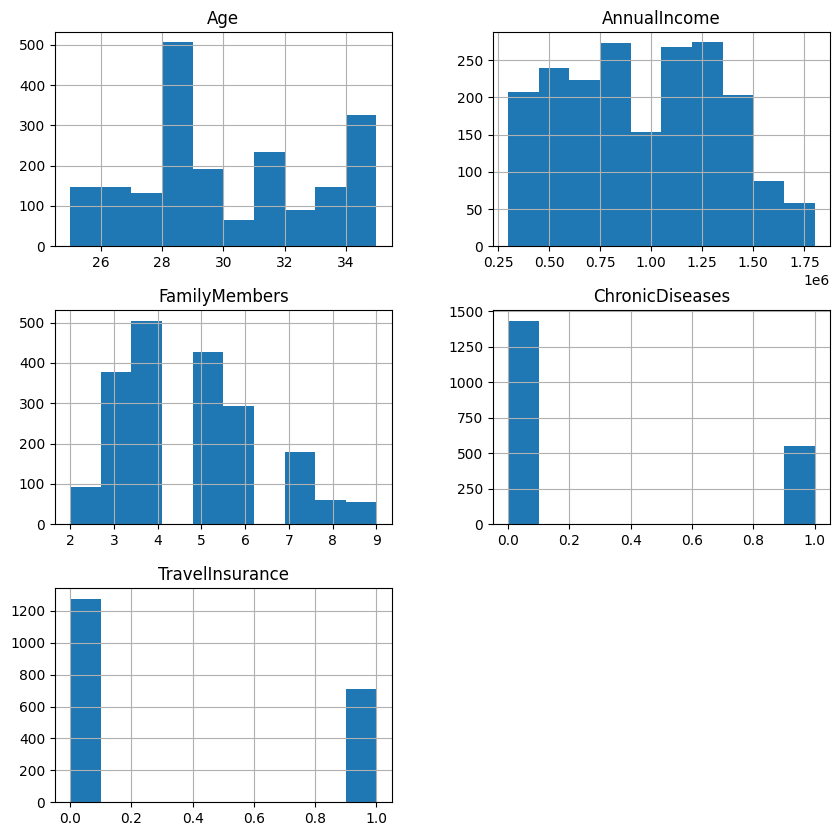

In [145]:
df.hist(figsize=(10,10))

## Data Analysis

In [146]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


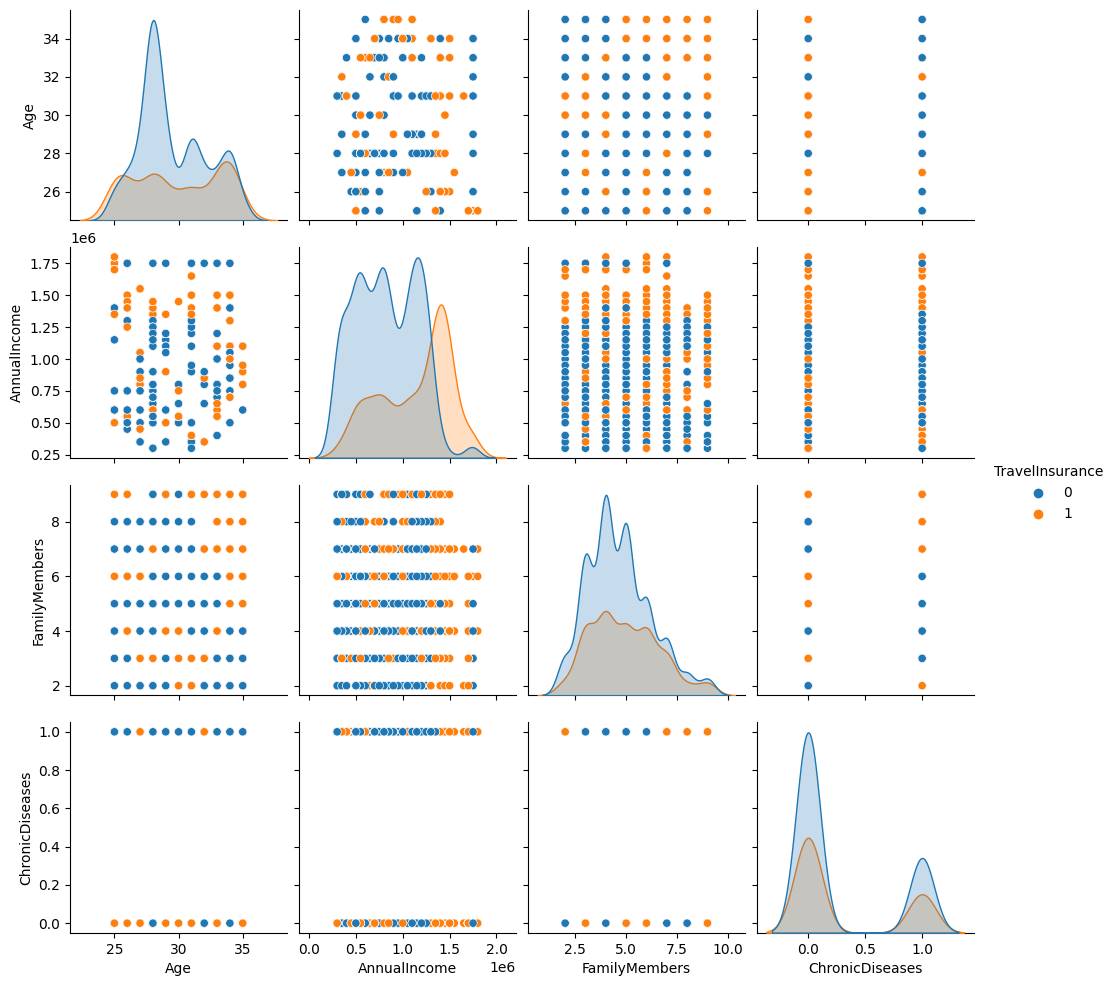

In [147]:
# Data analysis
# Todo: analyze your data here
sns.pairplot(df, hue='TravelInsurance')

['Employment Type', 'GraduateOrNot', 'FamilyMembers', 'FrequentFlyer', 'EverTravelledAbroad']


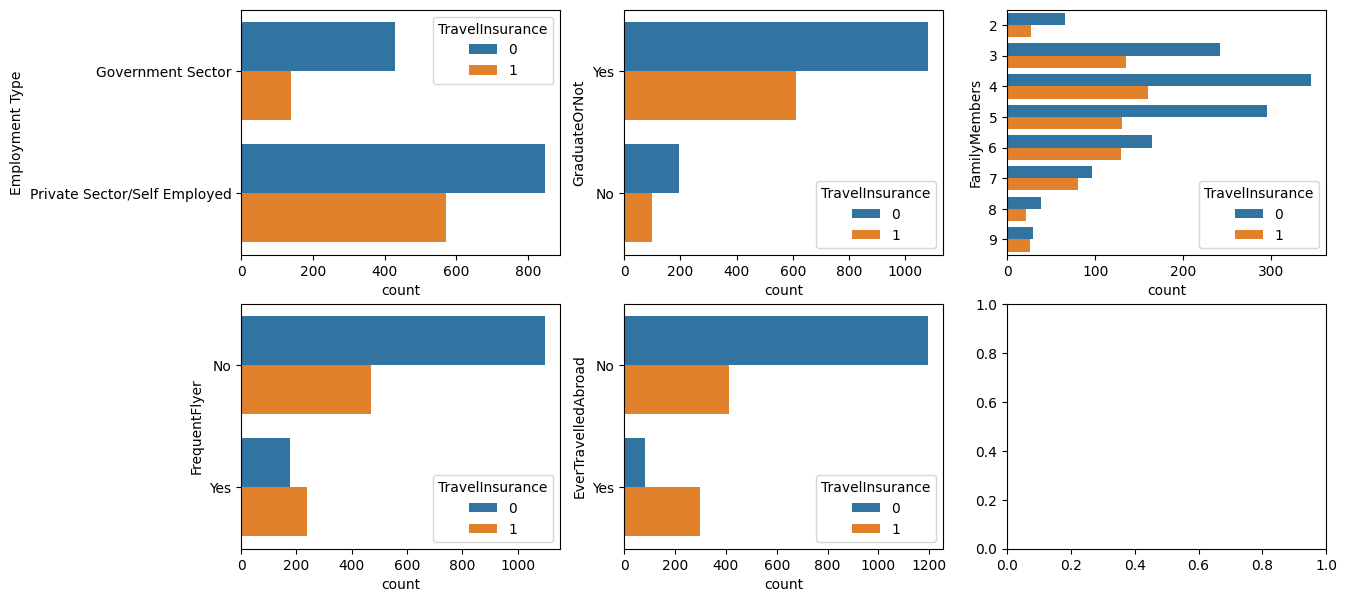

In [148]:
import math
categorical_features = [col for col in df.columns if df[col].dtypes=='O' or col=='FamilyMembers']
print(categorical_features)

def draw_countplot(df, cols, n_rows):
  n_cols = math.ceil(len(cols)/n_rows)
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(14,7), sharex=False, sharey=False) 
  for i, col in enumerate(cols):
    sns.countplot(data=df, y=col, hue='TravelInsurance', ax=axes[i//(math.ceil(len(cols)/n_rows)), i%n_cols])
    
draw_countplot(df, categorical_features, 2)

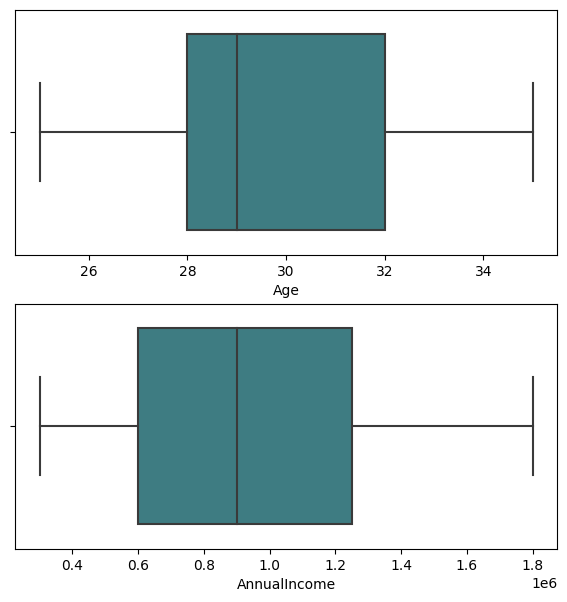

In [149]:
import math
#Vẽ boxplot cho các continuous features
def draw_boxplot(df, cols):
  fig, axes = plt.subplots(2, figsize=(7,7), sharex=False, sharey=False) 
  for i, col in enumerate(cols):
    sns.boxplot(data=df, x=col, palette='crest', ax=axes[i])

continuous_columns = ['Age', 'AnnualIncome']
draw_boxplot(df, continuous_columns)
#No outliers

## Preprocessing

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 155.2+ KB


In [151]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df = df.dropna()
    return df

In [152]:
df = preprocessing_data(df.copy())
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Feature Engineering

      Age  Employment Type  GraduateOrNot  AnnualIncome  FamilyMembers  \
0      31                0              1        400000              6   
1      31                1              1       1250000              7   
2      34                1              1        500000              4   
3      28                1              1        700000              3   
4      28                1              1        700000              8   
...   ...              ...            ...           ...            ...   
1982   33                1              1       1500000              4   
1983   28                1              1       1750000              5   
1984   28                1              1       1150000              6   
1985   34                1              1       1000000              6   
1986   34                1              1        500000              4   

      ChronicDiseases  FrequentFlyer  EverTravelledAbroad  TravelInsurance  
0                   1             

<Axes: >

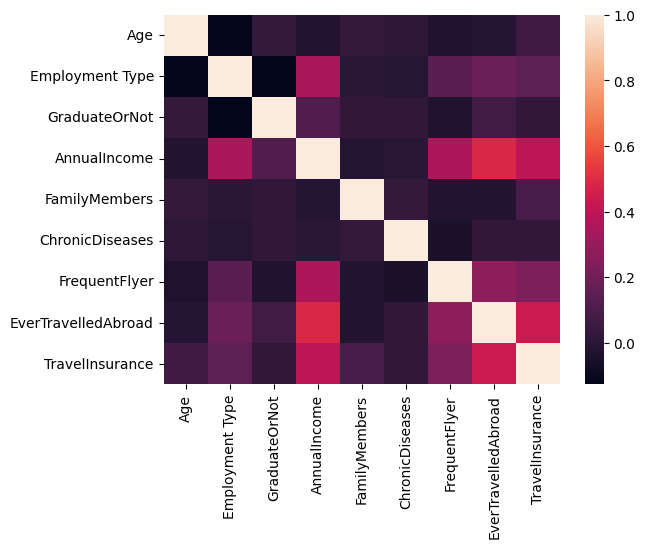

In [153]:
# Heatmap
import seaborn as sns
def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    obj_cols = [col for col in df.columns if df[col].dtypes=='O']
    #temp = pd.get_dummies(df[obj_cols])
    #df.drop(obj_cols, axis=1, inplace=True)
    #df = pd.concat([temp, df], axis=1)

    for col in obj_cols:
      df[col] = df[col].astype('category').cat.codes
    
    return df

df = apply_feature_engineering(df)
print(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Employment Type'}>,
        <Axes: title={'center': 'GraduateOrNot'}>],
       [<Axes: title={'center': 'AnnualIncome'}>,
        <Axes: title={'center': 'FamilyMembers'}>,
        <Axes: title={'center': 'ChronicDiseases'}>],
       [<Axes: title={'center': 'FrequentFlyer'}>,
        <Axes: title={'center': 'EverTravelledAbroad'}>,
        <Axes: title={'center': 'TravelInsurance'}>]], dtype=object)

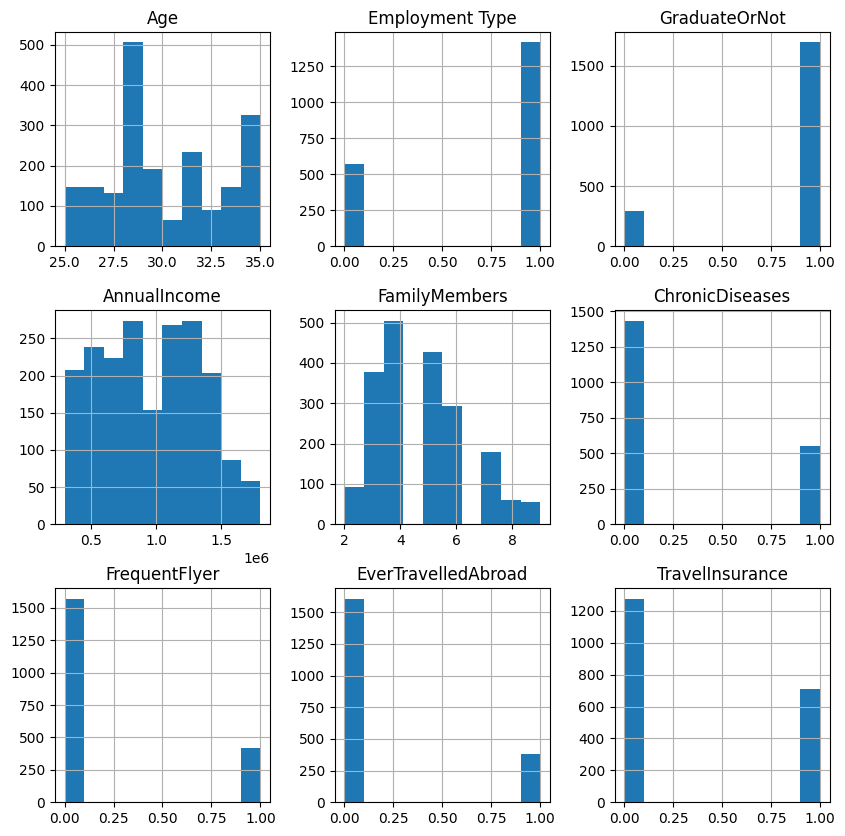

In [ ]:
df.hist(figsize=(10,10))

In [154]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop('TravelInsurance', axis=1).values# Todo: Select features
    y = df['TravelInsurance'].values# Todo: Select label
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [178]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 1
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [ ]:
!pip install git+https://github.com/remykarem/mixed-naive-bayes
from sklearn.base import BaseEstimator, ClassifierMixin
from mixed_naive_bayes import MixedNB


class MixedNaiveBayes(BaseEstimator, ClassifierMixin):
  def __init__(self, categorical_features, var_smoothing=1e-9, alpha=0.05, max_categories=None):
    self.categorical_features=categorical_features
    self.var_smoothing=var_smoothing
    self.alpha = alpha
    self.max_categories = max_categories
    self.model = MixedNB(categorical_features=self.categorical_features, var_smoothing=self.var_smoothing, alpha=self.alpha, max_categories=self.max_categories)

  def fit(self, X,y):
    self.model.fit(X,y)
    return self
  def predict(self, x):
    y_pred = self.model.predict(x)
    return y_pred

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/remykarem/mixed-naive-bayes to /tmp/pip-req-build-fuvc4ek0
  Running command git clone --filter=blob:none --quiet https://github.com/remykarem/mixed-naive-bayes /tmp/pip-req-build-fuvc4ek0
  Resolved https://github.com/remykarem/mixed-naive-bayes to commit 6d90de8adf75dbef032ad51029ad3782190ec577
  Preparing metadata (setup.py) ... done
  Created wheel for mixed-naive-bayes: filename=mixed_naive_bayes-0.0.4-py3-none-any.whl size=10881 sha256=7305d27a5d5cd0e09b512123a4183e577ddcb4913783958a387a3a60e78ddda0
  Stored in directory: /tmp/pip-ephem-wheel-cache-sb9yezek/wheels/16/0d/9f/929c7af51d4b12da89d0ac3c6ce4f4981214fee69d9440028e
Successfully built mixed-naive-bayes


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [179]:
def calculate_performance(y_true, y_pred):
    """
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    print("precision", precision_score(y_true, y_pred))
    print("recall", recall_score(y_true, y_pred))
    print("accuracy", accuracy_score(y_true, y_pred))
    print("F1", f1_score(y_true, y_pred))
    print('classification_report\n', classification_report(y_true, y_pred))
    # Todo: Only choose one of them as your score for the question 7
    main_score = f1_score(y_true, y_pred)
    return main_score

Build Gaussian Model

In [185]:
def build_gaussian_model(X, y):
  model = GaussianNB()
  pca = PCA()
  pipeline = Pipeline(steps=[
      ('pca', pca),
      ('model', model)
  ])
  param_grid = {
      'model__var_smoothing': np.logspace(-2, -9, num=100)
  }
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = RANDOM_STATE)
  grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1')
  grid.fit(X,y)
  return grid

#build gaussian model 
model = build_gaussian_model(trainX, trainY)
print(model.best_params_)
pred = model.predict(trainX)
print('On Train Set')
print(calculate_performance(trainY, pred))
pred = model.predict(testX)
print('On Test Set')
print(calculate_performance(testY, pred))


{'model__var_smoothing': 0.01}
On Train Set
precision 0.6983240223463687
recall 0.5040322580645161
accuracy 0.7453237410071942
F1 0.585480093676815
classification_report
               precision    recall  f1-score   support

           0       0.76      0.88      0.82       894
           1       0.70      0.50      0.59       496

    accuracy                           0.75      1390
   macro avg       0.73      0.69      0.70      1390
weighted avg       0.74      0.75      0.73      1390

0.585480093676815
On Test Set
precision 0.7581699346405228
recall 0.5420560747663551
accuracy 0.7738693467336684
F1 0.6321525885558583
classification_report
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       383
           1       0.76      0.54      0.63       214

    accuracy                           0.77       597
   macro avg       0.77      0.72      0.73       597
weighted avg       0.77      0.77      0.76       597

0.632152588555858

Build Bernoulli Model

In [186]:
def build_bernoulli_model(X, y):
  model = BernoulliNB()
  scaler = MinMaxScaler()
  pipeline = Pipeline(steps=[
      ('scaler', scaler),
      ('model', model)
  ])
  param_grid = {
      'model__alpha':np.arange(1e-5,2,0.1)
  }
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = RANDOM_STATE)
  grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring='recall')
  grid.fit(X,y)
  return grid

#build bernoulli model 
model = build_bernoulli_model(trainX, trainY)
print(model.best_params_)
print('On Train Set')
pred = model.predict(trainX)
print(calculate_performance(trainY, pred))
pred = model.predict(testX)
print('On Test Set')
print(calculate_performance(testY, pred))

{'model__alpha': 1e-05}
On Train Set
precision 0.6929824561403509
recall 0.4778225806451613
accuracy 0.7381294964028777
F1 0.5656324582338902
classification_report
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       894
           1       0.69      0.48      0.57       496

    accuracy                           0.74      1390
   macro avg       0.72      0.68      0.69      1390
weighted avg       0.73      0.74      0.72      1390

0.5656324582338902
On Test Set
precision 0.7368421052631579
recall 0.5233644859813084
accuracy 0.7621440536013401
F1 0.6120218579234972
classification_report
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       383
           1       0.74      0.52      0.61       214

    accuracy                           0.76       597
   macro avg       0.75      0.71      0.72       597
weighted avg       0.76      0.76      0.75       597

0.6120218579234972


Build Categorical Model

In [187]:
def build_categorical_model(X, y):
  model = CategoricalNB()
  pipeline = Pipeline(steps=[
      ('model', model)
  ])
  param_grid = {
      'model__alpha':np.arange(1e-5,5,0.1)
  }
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = RANDOM_STATE)
  grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1')
  grid.fit(X,y)
  return grid

#build bernoulli model without scaler and pca
model = build_categorical_model(trainX, trainY)

print(model.best_params_)
pred = model.predict(trainX)
print('On Train Set')
print(calculate_performance(trainY, pred))
pred = model.predict(testX)
print('On Test Set')
print(calculate_performance(testY, pred))



{'model__alpha': 0.10001}
On Train Set
precision 0.8614232209737828
recall 0.4637096774193548
accuracy 0.7820143884892087
F1 0.6028833551769331
classification_report
               precision    recall  f1-score   support

           0       0.76      0.96      0.85       894
           1       0.86      0.46      0.60       496

    accuracy                           0.78      1390
   macro avg       0.81      0.71      0.73      1390
weighted avg       0.80      0.78      0.76      1390

0.6028833551769331
On Test Set
precision 0.8974358974358975
recall 0.49065420560747663
accuracy 0.7973199329983249
F1 0.6344410876132931
classification_report
               precision    recall  f1-score   support

           0       0.77      0.97      0.86       383
           1       0.90      0.49      0.63       214

    accuracy                           0.80       597
   macro avg       0.84      0.73      0.75       597
weighted avg       0.82      0.80      0.78       597

0.6344410876132931


Build Mixed Model (Main Model)

In [183]:
def build_mixed_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """ 
    model = MixedNaiveBayes(categorical_features=[1,2,5,6,7])
    scaler = MinMaxScaler()
    # Todo: Input your scaler and logistic model into pipeline
    pipeline = Pipeline(steps=[
        ('scaler', scaler),
        ('model', model)
    ])
    param_grid={
        'model__var_smoothing': np.logspace(-2, -9, num=10)
    }
    # Todo: fit your model with X, y
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = RANDOM_STATE)
    grid = GridSearchCV(pipeline, param_grid, scoring='f1', cv=cv)
    grid.fit(X, y)
    return grid

model = build_mixed_model(trainX, trainY)
print("Best parameter (CV score=%0.3f):" % model.best_score_)
print(model.best_params_)
# Compare on training dataset
pred=model.predict(trainX)
print('On Train Set')
calculate_performance(trainY, pred)
print('On Test Set')
pred = model.predict(testX)
calculate_performance(testY, pred)

Best parameter (CV score=0.601):
{'model__var_smoothing': 0.01}
On Train Set
precision 0.7231638418079096
recall 0.5161290322580645
accuracy 0.7568345323741007
F1 0.6023529411764705
classification_report
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       894
           1       0.72      0.52      0.60       496

    accuracy                           0.76      1390
   macro avg       0.75      0.70      0.71      1390
weighted avg       0.75      0.76      0.75      1390

On Test Set
precision 0.7718120805369127
recall 0.5373831775700935
accuracy 0.7772194304857621
F1 0.6336088154269972
classification_report
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       383
           1       0.77      0.54      0.63       214

    accuracy                           0.78       597
   macro avg       0.78      0.72      0.74       597
weighted avg       0.78      0.78      0.77       597



0.6336088154269972

In [184]:
model = build_mixed_model(X, y)

In [137]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here

    return "7. Metric chính là f1, vì f1 là kết hợp của recall và precision và trong bài toán này, cả recall và precision đều quan trọng. Ta mong muốn tìm được càng nhiều người có thể sẽ mua bảo hiểm càng tốt để tăng doanh thu, tuy nhiên cũng không thể để FP (dự đoán mua bảo hiểm nhưng không mua) quá cao vì như thế sẽ tốn kém thêm chi phí để tiếp cận những người này" \
           "Other conclusion: MixedNB là model cho bài toán này vì dữ liệu có sự kết hợp của cả continuous features và categorical features, MinMaxScaler sẽ là scaler tương thích tốt với MixedNB vì nó scale continous features và giữ lại tính chất của các giá trị từ categorical features (các categorical features ở bài này có dạng là binary variables do đó khi áp dụng MinMax sẽ không có sự thay đổi)"
get_conclusion()

'7. Metric chính là f1, vì f1 là kết hợp của recall và precision và trong bài toán này, cả recall và precision đều quan trọng. Ta mong muốn tìm được càng nhiều người có thể sẽ mua bảo hiểm càng tốt để tăng doanh thu, tuy nhiên cũng không thể để FP (dự đoán mua bảo hiểm nhưng không mua) quá cao vì như thế sẽ tốn kém thêm chi phí để tiếp cận những người nàyOther conclusion: MixedNB là model cho bài toán này vì dữ liệu có sự kết hợp của cả continuous features và categorical features, MinMaxScaler sẽ là scaler tương thích tốt với MixedNB vì nó scale continous features và giữ lại tính chất của các giá trị từ categorical features (các categorical features ở bài này có dạng là binary variables do đó khi áp dụng MinMax sẽ không có sự thay đổi)'